In [104]:
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd

import pandas_datareader as pdr
from pandas_datareader import data as wb
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.family' : 'sans'})
sm, med, lg = 10, 15, 20
plt.rc('font', size = sm)         # controls default text sizes
plt.rc('axes', titlesize = med)   # fontsize of the axes title
plt.rc('axes', labelsize = med)   # fontsize of the x & y labels
plt.rc('xtick', labelsize = sm)   # fontsize of the tick labels
plt.rc('ytick', labelsize = sm)   # fontsize of the tick labels
plt.rc('legend', fontsize = sm)   # legend fontsize
plt.rc('figure', titlesize = lg)  # fontsize of the figure title
plt.rc('axes', linewidth=2)       # linewidth of plot lines


import seaborn as sns
sns.set()

from scipy.optimize import minimize

import itertools
from scipy import stats
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from mpl_finance import candlestick_ohlc


import yfinance as yf
from yahoofinancials import YahooFinancials
from urllib.request import urlopen
import requests


import locale, sys 
from datetime import date, datetime, timedelta
import time, csv, json, os

from IPython.display import IFrame
# ![img](images/paintcarelogo.png)

import warnings
warnings.filterwarnings('ignore')


print('\n          * * * NO ISSUES - ALL IMPORTS LOADED * * * \n')


          * * * NO ISSUES - ALL IMPORTS LOADED * * * 



# Standard Imports:

In [42]:
start = datetime(2018, 1, 2)
end = datetime.now()

# ticker = input('Ticker: ')
ticker = 'TSLA'
tickers = [ticker, '^GSPC', '^IXIC', '^DJI']

# Compare RoR:

In [43]:
PG = wb.DataReader(
    ticker, data_source = 'yahoo', start = start)
PG = pd.DataFrame(PG['Adj Close'])
PG.head()

,Adj Close
Date,
2018-01-02,64.106003
2018-01-03,63.450001
2018-01-04,62.924000
2018-01-05,63.316002
2018-01-08,67.281998


,Adj Close,S_RoR
Date,,
2018-01-02,64.106003,NaN
2018-01-03,63.450001,-0.010233
2018-01-04,62.924000,-0.008290
2018-01-05,63.316002,0.006230
2018-01-08,67.281998,0.062638


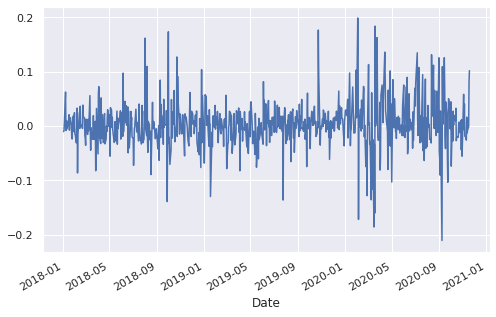

In [44]:
PG['S_RoR'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG['S_RoR'].plot(figsize = ( 8, 5))
PG.head()

In [45]:
avg_RoR_d = PG['S_RoR'].mean()
avg_RoR_a = PG['S_RoR'].mean()*250
print('Average-Daily-Mean RoR: '+f'{avg_RoR_d:%}')
print('Average-Annual-Mean RoR: ' + f'{avg_RoR_a:%}')

Average-Daily-Mean RoR: 0.372349%
Average-Annual-Mean RoR: 93.087287%


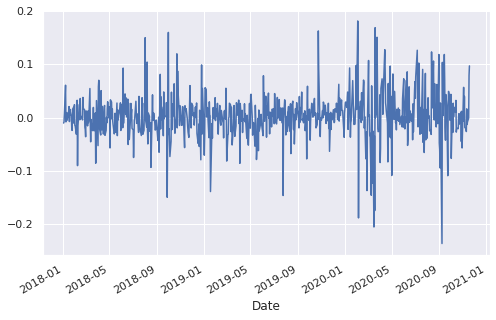

In [46]:
PG['log_RoR'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['log_RoR'].plot(figsize = (8,5));

In [47]:
log_RoR_d = PG['log_RoR'].mean()
log_RoR_a = PG['log_RoR'].mean()*250
print('DAILY LOG MEAN RATE OF RETURN: ' + f'{log_RoR_d:%}')
print('Annual-Log-Mean-Rate-of-Return: ' + f'{log_RoR_a:%}')

DAILY LOG MEAN RATE OF RETURN: 0.279199%
Annual-Log-Mean-Rate-of-Return: 69.799816%


In [48]:
print('Average-Annual-Mean RoR: ' + f'{avg_RoR_a:%}')
print('Annual-Log-Mean-Rate-of-Return: ' + f'{log_RoR_a:%}')

Average-Annual-Mean RoR: 93.087287%
Annual-Log-Mean-Rate-of-Return: 69.799816%


In [49]:
mydata=pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start=start)['Adj Close']
mydata.head()

,TSLA,^GSPC,^IXIC,^DJI
Date,,,,
2018-01-02,64.106003,2695.810059,7006.899902,24824.009766
2018-01-03,63.450001,2713.060059,7065.529785,24922.679688
2018-01-04,62.924000,2723.989990,7077.910156,25075.130859
2018-01-05,63.316002,2743.149902,7136.560059,25295.869141
2018-01-08,67.281998,2747.709961,7157.390137,25283.000000


In [50]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727 entries, 2018-01-02 to 2020-11-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    727 non-null    float64
 1   ^GSPC   727 non-null    float64
 2   ^IXIC   727 non-null    float64
 3   ^DJI    727 non-null    float64
dtypes: float64(4)
memory usage: 28.4 KB


In [51]:
mydata.describe()

,TSLA,^GSPC,^IXIC,^DJI
count,727.000000,727.000000,727.000000,727.000000
mean,117.244371,2931.285058,8368.657399,25953.854816
std,112.645860,255.254413,1318.738464,1681.195364
min,35.793999,2237.399902,6192.919922,18591.929688
25%,56.168999,2746.715088,7432.295166,24893.419922
50%,66.419998,2881.770020,7948.560059,25917.410156
75%,127.504002,3095.334961,8934.339844,26968.355469
max,498.320007,3626.909912,12056.440430,29950.439453


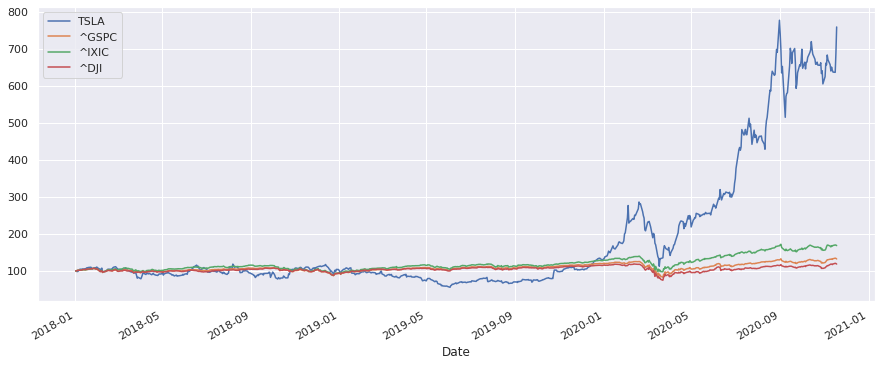

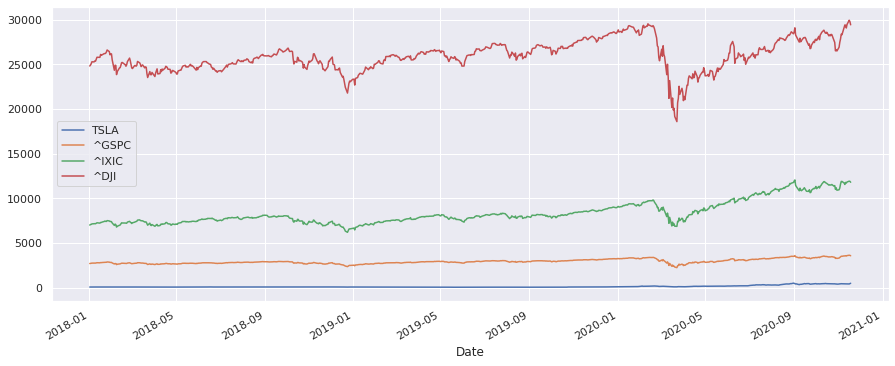

In [52]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15,6))
mydata.plot(figsize=(15,6));

In [53]:
Port_RoR = (mydata / mydata.shift(1))-1

In [54]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
np.dot(Port_RoR, weights)

A_Port_RoR = Port_RoR.mean()*250
A_Port_RoR

TSLA     0.930873
^GSPC    0.124637
^IXIC    0.213036
^DJI     0.090197
dtype: float64

In [55]:
np.dot(A_Port_RoR, weights)

pfolio_1 = 'The Annual Rate of Return For The Portfolio of Securities: '+str(round(np.dot(A_Port_RoR, weights), 5)*100)+'%'
pfolio_1

'The Annual Rate of Return For The Portfolio of Securities: 33.969%'

# Calculating Security Risk:

In [56]:
sec_data=pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']
    
sec_data.head()

,TSLA,^GSPC,^IXIC,^DJI
Date,,,,
2010-06-29,4.778,1041.239990,2135.179932,9870.299805
2010-06-30,4.766,1030.709961,2109.239990,9774.019531
2010-07-01,4.392,1027.369995,2101.360107,9732.530273
2010-07-02,3.840,1022.580017,2091.790039,9686.480469
2010-07-06,3.222,1028.060059,2093.879883,9743.620117


In [57]:
sec_RoR = np.log(sec_data / sec_data.shift(1))
sec_RoR.head()

,TSLA,^GSPC,^IXIC,^DJI
Date,,,,
2010-06-29,NaN,NaN,NaN,NaN
2010-06-30,-0.002515,-0.010164,-0.012223,-0.009802
2010-07-01,-0.081723,-0.003246,-0.003743,-0.004254
2010-07-02,-0.134312,-0.004673,-0.004565,-0.004743
2010-07-06,-0.175470,0.005345,0.000999,0.005882


In [69]:
for t in tickers:
    sec_RoR[t].mean()
    sec_RoR_D = sec_RoR[t].mean()

    # ANNUAL MEAN ROR
    sec_RoR_A = sec_RoR[t].mean()*250

    # STD DAILY
    sec_RoR[t].std()

    # STD ANNUAL
    sec_RoR_A_std = sec_RoR[t].std()*250**0.5

    # Variance
    sec_RoR_var = sec_RoR[t].var()
    PG_var_A = sec_RoR[t].var()*250

    print(f'The Below Scores Are For: {t} \n Annual STD: ' + f'{sec_RoR_A_std:%}')
    print(' Daily-Log-Mean-RoR: ' + f'{sec_RoR_D:%}')
    print(' Annual-Log-Mean-RoR: ' + f'{sec_RoR_A:%}')
    print(' Annual Variance: ' + f'{PG_var_A:%}')
    print(f' Daily Variance: {sec_RoR_var:%} \n')

The Below Scores Are For: TSLA 
 Annual STD: 55.807921%
 Daily-Log-Mean-RoR: 0.176672%
 Annual-Log-Mean-RoR: 44.167966%
 Annual Variance: 31.145241%
 Daily Variance: 0.124581% 

The Below Scores Are For: ^GSPC 
 Annual STD: 17.411883%
 Daily-Log-Mean-RoR: 0.047059%
 Annual-Log-Mean-RoR: 11.764750%
 Annual Variance: 3.031737%
 Daily Variance: 0.012127% 

The Below Scores Are For: ^IXIC 
 Annual STD: 19.403179%
 Daily-Log-Mean-RoR: 0.065330%
 Annual-Log-Mean-RoR: 16.332481%
 Annual Variance: 3.764834%
 Daily Variance: 0.015059% 

The Below Scores Are For: ^DJI 
 Annual STD: 17.426701%
 Daily-Log-Mean-RoR: 0.041757%
 Annual-Log-Mean-RoR: 10.439152%
 Annual Variance: 3.036899%
 Daily Variance: 0.012148% 



In [71]:
# DAILY COVARIANCE MATRIX

cov_matrix_D = sec_RoR.cov()
cov_matrix_D

,TSLA,^GSPC,^IXIC,^DJI
TSLA,0.001246,0.000155,0.000199,0.000142
^GSPC,0.000155,0.000121,0.000129,0.000118
^IXIC,0.000199,0.000129,0.000151,0.000121
^DJI,0.000142,0.000118,0.000121,0.000121


In [72]:
# ANNUAL COVARIANCE MATRIX

cov_matrix_A = sec_RoR.cov()*250
cov_matrix_A

,TSLA,^GSPC,^IXIC,^DJI
TSLA,0.311452,0.038703,0.049641,0.035391
^GSPC,0.038703,0.030317,0.032234,0.029570
^IXIC,0.049641,0.032234,0.037648,0.030261
^DJI,0.035391,0.029570,0.030261,0.030369


In [73]:
# DAILY CORRELATION MATRIX

corr_matrix_D = sec_RoR.corr()
corr_matrix_D

,TSLA,^GSPC,^IXIC,^DJI
TSLA,1.000000,0.398295,0.458427,0.363904
^GSPC,0.398295,1.000000,0.954114,0.974509
^IXIC,0.458427,0.954114,1.000000,0.894950
^DJI,0.363904,0.974509,0.894950,1.000000


# CALCULATING PORTFOLIO RISK:

In [83]:
# EQUAL WEIGHT SCHEME:
    
weights = np.array([.5, .2, .2, .1])

In [84]:
# PORTFOLIO VARIANCE:
    
pfolio_var = np.dot(weights.T, np.dot(sec_RoR.cov()*250, weights))
print('PORTFOLIO_Variance = ' + f'{pfolio_var:%}')

PORTFOLIO_Variance = 10.706533%


In [85]:
# PORTFOLIO VOLATILITY:
    
pfolio_vol = np.dot(weights.T, np.dot(sec_RoR.cov()*250, weights))**0.5
print('PORTFOLIO_VOLATILITY = ' + f'{pfolio_vol:%}')

PORTFOLIO_VOLATILITY = 32.720839%


In [86]:
annual_var = []
for t in tickers:
    annual_var.append(sec_RoR[t].var() * 250)

In [89]:
for w in range(len(weights)):
    lst = []
    lst.append(weights[w]**2 * annual_var[w])

res = 0.0 - pfolio_var
for i in lst:
    res = res - i

print('ANNUAL_DIVERSIFIABLE_RISK = ' + f'{res:%}')

ANNUAL_DIVERSIFIABLE_RISK = -10.736902%


In [90]:
n_dr_1 = pfolio_var - res
print('ANNUAL_NON-DIVERSIFIABLE RISK = ' + f'{n_dr_1:%}')

ANNUAL_NON-DIVERSIFIABLE RISK = 21.443435%


In [91]:
c = 0.0
for l in lst:
    c = c + l
print('ANNUAL_NON-DIVERSIFIABLE RISK = ' + f'{c:%}')

ANNUAL_NON-DIVERSIFIABLE RISK = 0.030369%


# REGRESSION: 

In [92]:
tickers =['AMZN','GOOG']

reg_data = pd.DataFrame()

for t in tickers:
    reg_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']
    
reg_data.head()

,AMZN,GOOG
Date,,
2007-01-03,38.700001,232.921951
2007-01-04,38.900002,240.727692
2007-01-05,38.369999,242.685349
2007-01-08,37.500000,240.887100
2007-01-09,37.779999,241.843506


In [93]:
reg_data[['AMZN', 'GOOG']].head()

,AMZN,GOOG
Date,,
2007-01-03,38.700001,232.921951
2007-01-04,38.900002,240.727692
2007-01-05,38.369999,242.685349
2007-01-08,37.500000,240.887100
2007-01-09,37.779999,241.843506


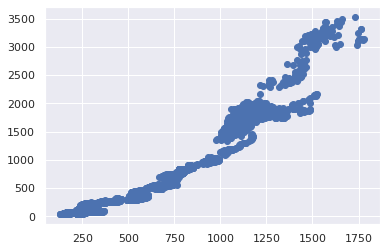

In [95]:
X = reg_data['GOOG']
Y = reg_data['AMZN']

plt.scatter(X, Y);

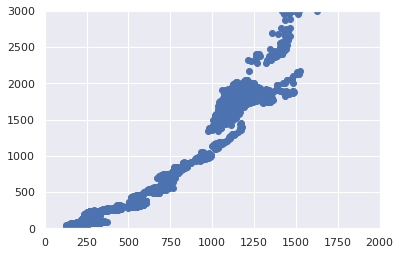

In [97]:
plt.scatter(X, Y)
plt.axis([0,2000,0,3000]);

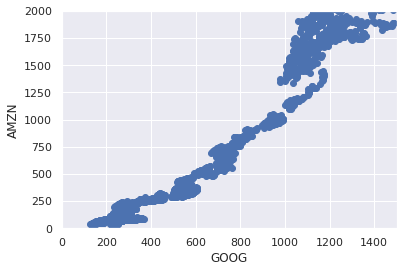

In [98]:
plt.scatter(X, Y)
plt.axis([0,1500,0,2000])
plt.ylabel('AMZN')
plt.xlabel('GOOG');

In [99]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 3.954e+04
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        03:46:30   Log-Likelihood:                -23771.
No. Observations:                3496   AIC:                         4.755e+04
Df Residuals:                    3494   BIC:                         4.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -463.2177      6.782    -68.300      0.000    -476.515    -449.920
GOOG           1.8653      0.009    198.848      0.000       1.847       1.884
==============================================================================
Omnibus:                      592.891   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.884
Skew:                           0.938   Prob(JB):                         0.00
Kurtosis:                       5.567   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
A = 365.3129       # COER /CONSTANT ^
B = 1.6386         # GOOG / CORR ^

Y_est=(A + B)
print('EXPECTED VALUE OF Y = ' + f'{Y_est:,}')

EXPECTED VALUE OF Y = 366.9515


In [115]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
reg_lst = [slope, intercept, r_value, p_value, std_err]
reg_lst1 = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']

for reg in range(len(reg_lst)):
    print(f' {reg_lst1[reg]} = {reg_lst[reg]}')

 slope = 1.865295025144741
 intercept = -463.2176644070378
 r_value = 0.9585456003057808
 p_value = 0.0
 std_err = 0.009380488654061953


# Markowitz Portfolio Optimization
*

* Markowitz Portfolio theory – One of the main pillars of modern Finance
* Obtaining the Efficient Frontier in Python – Part I
* Obtaining the Efficient Frontier in Python – Part II
* Obtaining the Efficient Frontier in Python – Part III

In [116]:
pf_data = pd.DataFrame()

for t in tickers:
    pf_data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

pf_data.head()

,AMZN,GOOG
Date,,
2010-01-04,133.899994,312.204773
2010-01-05,134.690002,310.829926
2010-01-06,132.250000,302.994293
2010-01-07,130.000000,295.940735
2010-01-08,133.520004,299.885956


,AMZN,GOOG
AMZN,1.000000,0.578629
GOOG,0.578629,1.000000


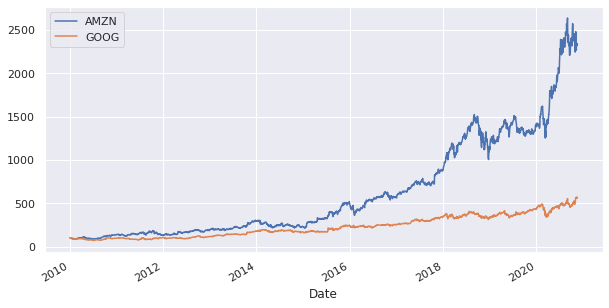

In [117]:
(pf_data / pf_data.iloc[0]*100).plot(figsize = (10,5))

log_returns = np.log(pf_data / pf_data.shift(1))

log_returns.mean()*250

log_returns.cov()*250

log_returns.corr()

In [119]:
num_assets = len(tickers)
arr = np.random.random(2)
arr[0] + arr[1]

weights = np.random.random(num_assets)
weights /= np.sum(weights)

## Obtaining the Efficient Frontier–Part II

In [120]:
port_est_ror = np.sum(weights * log_returns.mean())*250
print('EXPECTED PORTFOLIO RETURN = ' + f'{port_est_ror:%}')

EXPECTED PORTFOLIO RETURN = 21.035716%


In [121]:
port_est_var = np.dot(weights.T, np.dot(log_returns.cov()*250, weights))
print('EXPECTED PORTFOLIO VARIANCE = ' + f'{port_est_var:%}')

EXPECTED PORTFOLIO VARIANCE = 6.303676%


In [122]:
port_est_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
print('EXPECTED PORTFOLIO VARIANCE = ' + f'{port_est_vol:%}')

EXPECTED PORTFOLIO VARIANCE = 25.107123%


In [124]:
pfolio_returns =[]
pfolio_volatilities =[]

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))))

In [125]:
pfolio_returns =[]
pfolio_volatilities =[]

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

## Obtaining the Efficient Frontier – Part III

In [126]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.205833,0.249860
1,0.188179,0.248481
2,0.261133,0.286162
3,0.232884,0.262051
4,0.257800,0.282794


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


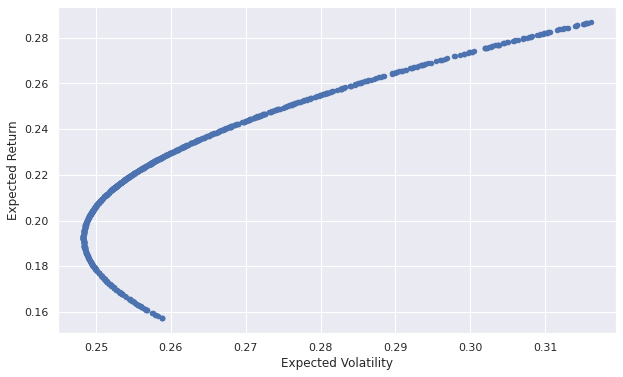

In [127]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');

# The Capital Asset Pricing Model
* 

* The intuition behind the Capital Asset Pricing Model (CAPM)
* Understanding and calculating a security's Beta
* Calculating the Beta of a Stock
* The CAPM formula
* Calculating the Expected Return of a Stock (CAPM)
* Introducing the Sharpe ratio and the way it can be applied in practice
* Obtaining the Sharpe ratio in Python
* Measuring alpha and verifying how good (or bad) a portfolio manager is doing

In [141]:
    # LOG RETURN
sec_returns = np.log(pf_data / pf_data.shift(1))

    # COVARIANCE
cov = sec_returns.cov()*250

    # COVARIANCE with market
cov_w_mkt = cov.iloc[0,1]
    
    # MARKET VARIANCE
mkt_var = sec_returns[tickers[0]].var()*250

# BETA:
bbeta = cov_w_mkt / mkt_var

# expected return
er = 0.025 + bbeta * 0.05

Sharpe = (er - 0.025) / (sec_returns[tickers[0]].std()*250**0.5)


print(f'covariance = {cov}\n\ncovariance to market = {cov_w_mkt}\nmarket variance = {mkt_var}\n\nBeta = {bbeta}\n\nexpected return = {er:%}\n\nsharpe = {Sharpe:%}\n\n')

covariance =           AMZN      GOOG
AMZN  0.099955  0.047356
GOOG  0.047356  0.067010

covariance to market = 0.04735589354889008
market variance = 0.09995527429796738

Beta = 0.4737708328199053

expected return = 4.868854%

sharpe = 7.492650%




In [142]:
reg_data

,AMZN,GOOG
Date,,
2007-01-03,38.700001,232.921951
2007-01-04,38.900002,240.727692
2007-01-05,38.369999,242.685349
2007-01-08,37.500000,240.887100
2007-01-09,37.779999,241.843506
...,...,...
2020-11-12,3110.280029,1749.839966
2020-11-13,3128.810059,1777.020020
2020-11-16,3131.060059,1781.380005


In [143]:
X = reg_data['AMZN'].values
y = reg_data['GOOG'].values

In [144]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          2.921e+04
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        04:10:13   Log-Likelihood:                         -24068.
No. Observations:                3496   AIC:                                  4.814e+04
Df Residuals:                    3495   BIC:                                  4.814e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6732      0.004    170.901      0.000       0.665       0.681
==============================================================================
Omnibus:                     1806.568   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11350.391
Skew:                          -2.448   Prob(JB):                         0.00
Kurtosis:                      10.345   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Gross Profit

In [146]:
rev_m = 170
rev_stdev = 20
iterations = 1000

rev = np.random.normal(rev_m, rev_stdev, iterations)

([<matplotlib.lines.Line2D at 0x7f2ad4dff5b0>],)

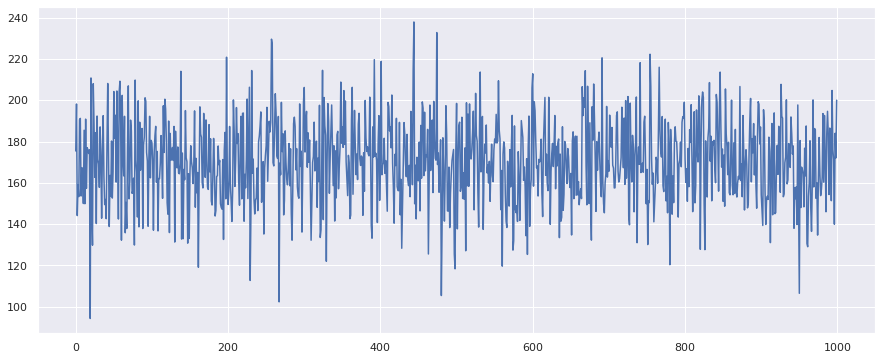

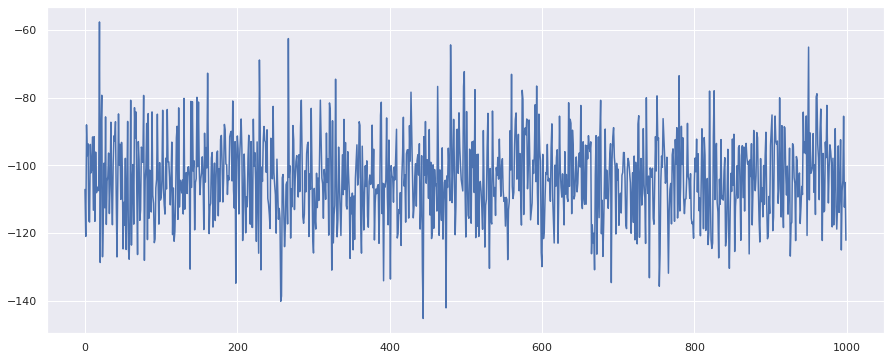

In [147]:
plt.figure(figsize = (15, 6))
plt.plot(rev)

COGS = - (rev * np.random.normal(0.6, 0.1))
plt.figure(figsize=(15, 6))
plt.plot(COGS),

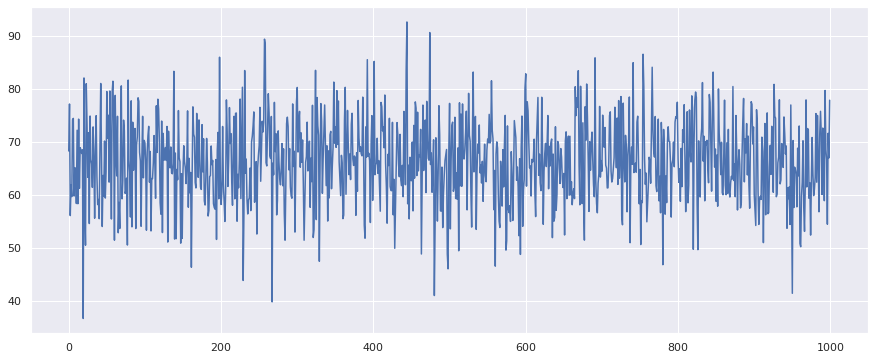

In [149]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit);

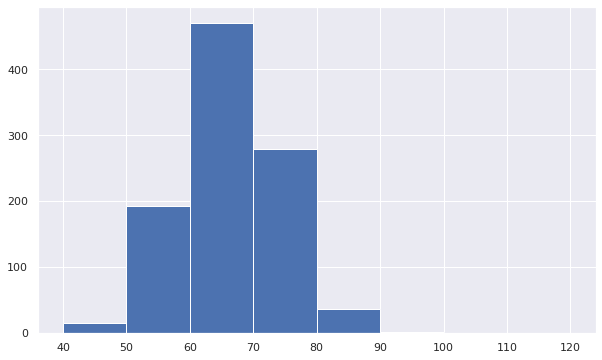

In [150]:
plt.figure(figsize=(10, 6))
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);

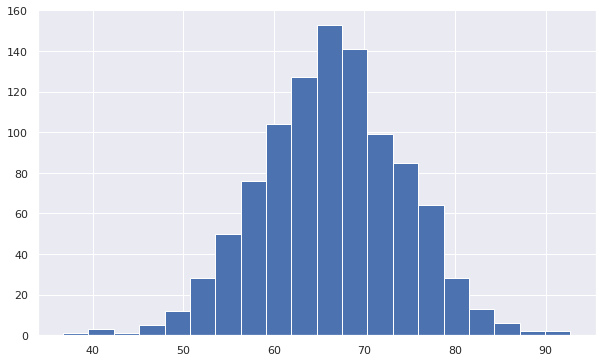

In [151]:
plt.figure(figsize=(10, 6))
plt.hist(Gross_Profit, bins = 20);